## 실습
조별 심사평가원 주제 도출 및 시각화

In [1]:
# 1. 시각적으로 표현할 분석 소주제 5개
# 2. 전처리(결측/이상/중복) 모두 처리 진행
#  - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
# 3. 주제별 시각화 그래프 2개 이상
# 4. 주제별 분석 내용 작성: 개인별로 작성
# 5. 제출: 분석내용 + 가공 데이터파일 + inynb 파일
#  - 제출형식: 모두 압축 - 본인이름.zip
#  - 제출위치: 구글드라이브 -> 3_산출물 -> 1_심평원
# 6. 문제해결: 조별로 스터디 하면서 해결

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

In [3]:
# 0. 진료과목코드를 이용하여 요양개시일자로 월별 집계 (월마다 무슨 과를 많이 방문했는지)

file_path = "C:/STUDY/StudyPython/jupyter/flis4/files_org/df_20table_명세서일반내역TABLE_kor_명세서일반내역.xlsx"
df_table = pd.read_excel(file_path)          
df_table

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [4]:
df_table['진료과목코드'] = df_table['진료과목코드'].astype(str)

In [5]:
df_table['진료과목코드'].str.zfill(2)

df_table['진료과목코드'] =  df_table['진료과목코드'].str.zfill(2)

In [6]:
df = df_table[["진료과목코드", "요양개시일자"]]
df

,진료과목코드,요양개시일자
0,01,20130108
1,00,20130212
2,03,20130222
3,54,20130608
4,01,20131128
...,...,...
5626,56,20131001
5627,01,20130423
5628,11,20130112
5629,05,20130401


In [7]:
df_CODE = pd.read_excel('C:/STUDY/StudyPython/jupyter/flis4/files_org/표본자료 변수 테이블(2012-2013).xlsx', sheet_name=5, usecols="B,C", skiprows=2 )
df_CODE

df_CODE = df_CODE.loc[:47]
df_CODE

df_CODE.columns=['진료과목코드','과이름']
df_CODE

,진료과목코드,과이름
0,00,일반의
1,01,내과
2,02,신경과
3,03,정신과
4,04,외과
5,05,정형외과
6,06,신경외과
7,07,흉부외과
8,08,성형외과
9,09,마취통증의학과


In [8]:

df_CODE['진료과목코드'] = df_CODE['진료과목코드'].astype(str)

df = pd.merge(df, df_CODE, how='left', on='진료과목코드')
df

,진료과목코드,요양개시일자,과이름
0,01,20130108,내과
1,00,20130212,일반의
2,03,20130222,정신과
3,54,20130608,치주과
4,01,20131128,내과
...,...,...,...
5626,56,20131001,구강내과
5627,01,20130423,내과
5628,11,20130112,소아청소년과
5629,05,20130401,정형외과


In [9]:
df.value_counts("과이름")

과이름
내과         1808
정형외과        755
소아청소년과      468
이비인후과       358
피부과         269
안과          268
가정의학과       241
치과보존과       213
외과          183
마취통증의학과     154
정신과         131
산부인과        108
일반의         107
비뇨기과         95
신경과          87
치주과          81
재활의학과        77
신경외과         65
구강악안면외과      64
응급의학과        38
소아치과         22
성형외과         17
예방의학과         7
흉부외과          5
영상의학과         4
치과보철과         3
치과            2
구강내과          1
dtype: int64

In [19]:
df['요양개시일자'] = df["요양개시일자"].astype(str)
df['요양개시월'] = df["요양개시일자"].str[4:6]
df

,진료과목코드,요양개시일자,과이름,요양개시월
0,01,20130108,내과,01
1,00,20130212,일반의,02
2,03,20130222,정신과,02
3,54,20130608,치주과,06
4,01,20131128,내과,11
...,...,...,...,...
5626,56,20131001,구강내과,10
5627,01,20130423,내과,04
5628,11,20130112,소아청소년과,01
5629,05,20130401,정형외과,04


In [20]:
df1 = df[['과이름','요양개시월']]
df1

,과이름,요양개시월
0,내과,01
1,일반의,02
2,정신과,02
3,치주과,06
4,내과,11
...,...,...
5626,구강내과,10
5627,내과,04
5628,소아청소년과,01
5629,정형외과,04


In [71]:
df_3 = df1[df1['과이름']=='내과']
df_3

,과이름,요양개시월
0,내과,01
4,내과,11
11,내과,01
14,내과,09
17,내과,01
...,...,...
5606,내과,02
5610,내과,08
5612,내과,01
5619,내과,10


In [ ]:
# df1.pivot_table(values = '과이름',
#                 index='과이름',
#                 columns = "요양개시월")

In [93]:
df4 = [df_3["요양개시월"].value_counts().sort_index()]
df4

[01    162
 02    149
 03    177
 04    146
 05    157
 06    136
 07    129
 08    126
 09    128
 10    168
 11    182
 12    148
 Name: 요양개시월, dtype: int64]

In [95]:
import matplotlib as mpl
import matplotlib.pylab as plt

In [100]:
df4 = pd.DataFrame(df4).T

Text(0, 0.5, '환자수')

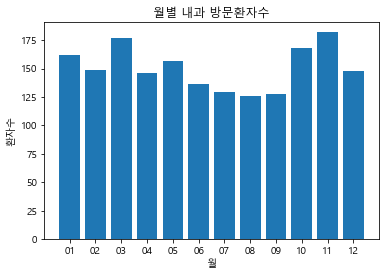

In [126]:
plt.rc('font', family='Malgun Gothic',size = 10)
plt.bar(df4.index, df4['요양개시월'])
plt.title('월별 내과 방문환자수')
plt.xlabel('월')
plt.ylabel('환자수')


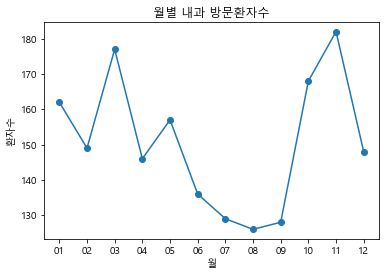

In [138]:
plt.rc("font", family='Malgun Gothic') 
plt.plot(df4.index, df4['요양개시월'],marker='o')
plt.ylim = (0, 175) # y축 지점의 값들
plt.title('월별 내과 방문환자수') 
plt.ylabel('환자수', fontsize=10)
plt.xlabel('월', fontsize=10)
plt.show()

